In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn import model_selection
%matplotlib inline

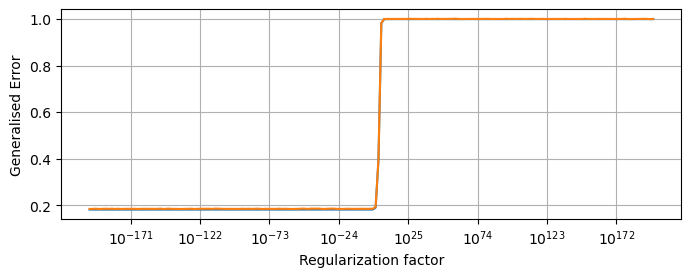

In [7]:

data = pd.read_csv("StandardizedDataFrameWithNansFilled.csv", index_col=0)
data["Status"] = [1 if stat == "Developed" else 0 for stat in data["Status"]]
data.head()

y = data['Life expectancy '].values
y=y.T
X_drop = data.drop(columns = ['Country','Year','Life expectancy '])

# Add offset attribute
attributeNames = X_drop.columns
X_drop = np.concatenate((np.ones((X_drop.shape[0],1)),X_drop),1)
attributeNames = [u'Offset']+attributeNames
N, M = X_drop.shape
X = X_drop

# Values of lambda
lambdas = np.power(100.,range(-100,100))

# Initialize variables


Test =[]
Train =[]
for lamb in lambdas:
    ## Crossvalidation
    # Create crossvalidation partition for evaluation
    K = 10
    CV = model_selection.KFold(K, shuffle=True)

    Error_train_rlr = np.zeros((K,1))
    Error_test_rlr = np.zeros((K,1))

    w_rlr = np.empty((M,K))

    k=0
    for train_index, test_index in CV.split(X,y):
        
        # extract training and test set for current CV fold
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        Xty = X_train.T @ y_train
        XtX = X_train.T @ X_train

        # Estimate weights for the value of lambda, on entire training set
        lambdaI = lamb * np.eye(M)
        lambdaI[0,0] = 0 # Do no regularize the bias term
        w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
        # Compute mean squared error with regularization with lambda
        Error_train_rlr[k] = np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
        Error_test_rlr[k] = np.square(y_test-X_test @ w_rlr[:,k]).sum(axis=0)/y_test.shape[0]
        k +=1
            # OR ALTERNATIVELY: you can use sklearn.linear_model module for linear regression:
    #m = lm.LinearRegression().fit(X_train, y_train)
    #Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    #Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

        
    Test.append(np.mean(Error_test_rlr))
    Train.append(np.mean(Error_train_rlr))

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)        
plt.semilogx(lambdas,Train) # Don't plot the bias term\
plt.semilogx(lambdas,Test) # Don't plot the bias term
plt.xlabel('Regularization factor')
plt.ylabel('Generalised Error')
plt.grid()




In [4]:
print(Train)

[0.18128261039040588, 0.18129434613066484, 0.18127354273750312, 0.1812760253408346, 0.18130967752832503, 0.18132863211793865, 0.18130410245662634, 0.18130361523489438, 0.1813167212350024, 0.18131541890107195, 0.18142174301812644, 0.19004797518144573, 0.3961360809945032, 0.9814434236791975, 0.999383791465372, 0.9996332599825861, 0.9996256808669536, 0.9996151888339325]


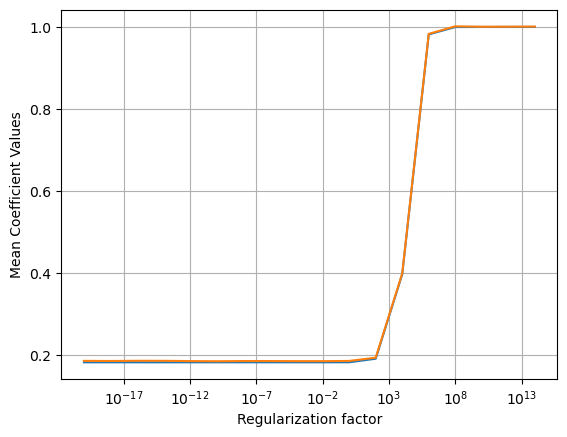

In [5]:
plt.semilogx(lambdas,Train) # Don't plot the bias term\
plt.semilogx(lambdas,Test) # Don't plot the bias term
plt.xlabel('Regularization factor')
plt.ylabel('Mean Coefficient Values')
plt.grid()